In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
from scipy.stats import poisson

/usr/lib/python2.7/dist-packages/matplotlib/__init__.py:874: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
df = pd.read_csv("../data/asylum_seekers_monthly.csv", header = 3, low_memory=False, dtype={'Year': str})
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')
df=df.dropna(subset=['Value'])
df.sort_values('Value',ascending=False).head(10)

Country / territory of asylum/residence            Origin  Year  \
315117                                 Germany  Syrian Arab Rep.  2016   
293335                                 Germany  Syrian Arab Rep.  2015   
315118                                 Germany  Syrian Arab Rep.  2016   
315116                                 Germany  Syrian Arab Rep.  2016   
293334                                 Germany  Syrian Arab Rep.  2015   
315119                                 Germany  Syrian Arab Rep.  2016   
315123                                 Germany  Syrian Arab Rep.  2016   
315121                                 Germany  Syrian Arab Rep.  2016   
293336                                 Germany  Syrian Arab Rep.  2015   
315122                                 Germany  Syrian Arab Rep.  2016   

           Month    Value  
315117  February  36860.0  
293335  November  30863.0  
315118     March  30856.0  
315116   January  30261.0  
293334   October  30216.0  
315119     April  28561.0  
315123    August  27315.0  
315121      June  26454.0  
293336  December  25250.0  
315122      July  23979.0

Based off knowledge of current events in these countries, I have chosen to analyze Haiti, North Korea, El Salvador, Guatemala, and Iran.

I need to find the mean, median, and standard deviation to plot divergence of mean and a poission distribution.

In [3]:
haiti = df[df['Origin']=='Haiti']
haiti.head(10)

Country / territory of asylum/residence Origin  Year      Month  Value
1752                                 Belgium  Haiti  1999    January    1.0
2956                                  Canada  Haiti  1999    January   15.0
2957                                  Canada  Haiti  1999   February    9.0
2958                                  Canada  Haiti  1999      March   20.0
2959                                  Canada  Haiti  1999      April    6.0
2960                                  Canada  Haiti  1999        May   11.0
2961                                  Canada  Haiti  1999       June   21.0
2962                                  Canada  Haiti  1999       July   18.0
2963                                  Canada  Haiti  1999     August   30.0
2964                                  Canada  Haiti  1999  September   51.0

In [4]:
haiti.describe()

Value
count  1104.000000
mean    108.547101
std     124.815046
min       1.000000
25%      14.000000
50%      65.500000
75%     157.000000
max    1181.000000

In [5]:
haitiavg = haiti.mean()
haitimed = haiti.median()
haitistd = haiti.std()

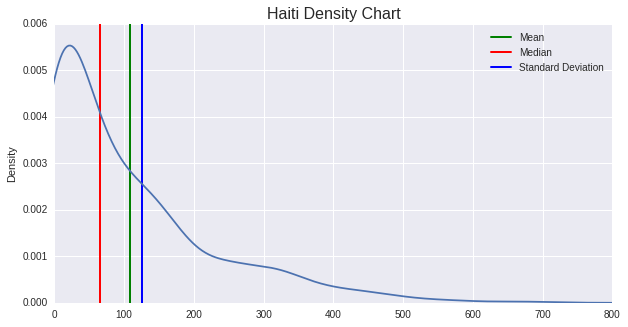

In [6]:
haiti.plot(kind="density",
                figsize=(10,5),
                xlim=(0, 800))


haverage = plt.vlines(haitiavg,     # Plot black line at mean
           ymin=0, 
           ymax=0.006,
           linewidth=2.0,
           color="green",
           label='Mean')

hmedian = plt.vlines(haitimed,   # Plot red line at median
           ymin=0, 
           ymax=0.006,
           linewidth=2.0,
           color="red",
           label='Median')

hstd = plt.vlines(haitistd,   # Plot blue line at standard deviation 
            ymin=0, 
            ymax=0.006,
            linewidth=2.0,
            color="blue",
            label='Standard Deviation')

plt.legend(handles=[haverage, hmedian, hstd])
plt.title('Haiti Density Chart', fontsize=16)

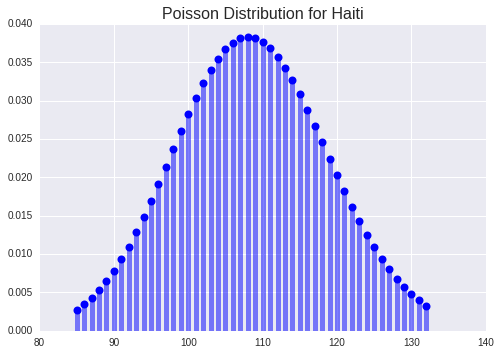

In [7]:
fig, ax = plt.subplots(1, 1)
mu = haitiavg
mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')
x = np.arange(poisson.ppf(0.01, mu), poisson.ppf(0.99, mu))
ax.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
ax.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)
plt.title('Poisson Distribution for Haiti', fontsize=16)

In [8]:
pakistan = df[df['Origin']=='Pakistan']
pakistan.head(10)

Country / territory of asylum/residence    Origin  Year      Month  Value
409                               Australia  Pakistan  1999    January   12.0
410                               Australia  Pakistan  1999   February    5.0
411                               Australia  Pakistan  1999      March   12.0
412                               Australia  Pakistan  1999      April    7.0
413                               Australia  Pakistan  1999        May   12.0
414                               Australia  Pakistan  1999       June   12.0
415                               Australia  Pakistan  1999       July    8.0
416                               Australia  Pakistan  1999     August    8.0
417                               Australia  Pakistan  1999  September   12.0
418                               Australia  Pakistan  1999    October    9.0

In [9]:
pakistan.describe()

Value
count  5962.000000
mean     57.495807
std     165.124651
min       1.000000
25%       4.000000
50%      13.000000
75%      41.000000
max    6100.000000

In [10]:
pakistanavg = pakistan.mean()
pakistanmed = pakistan.median()
pakistanstd = pakistan.std()

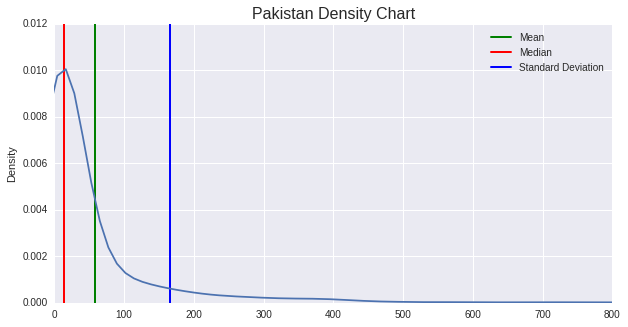

In [11]:
pakistan.plot(kind="density",
                figsize=(10,5),
                xlim=(0, 800))


paverage = plt.vlines(pakistanavg,     # Plot black line at mean
           ymin=0, 
           ymax=0.012,
           linewidth=2.0,
           color="green",
           label='Mean')

pmedian = plt.vlines(pakistanmed,   # Plot red line at median
           ymin=0, 
           ymax=0.012,
           linewidth=2.0,
           color="red",
           label='Median')

pstd = plt.vlines(pakistanstd,   # Plot blue line at standard deviation 
            ymin=0, 
            ymax=0.012,
            linewidth=2.0,
            color="blue",
            label='Standard Deviation')

plt.legend(handles=[paverage, pmedian, pstd])
plt.title('Pakistan Density Chart', fontsize=16)

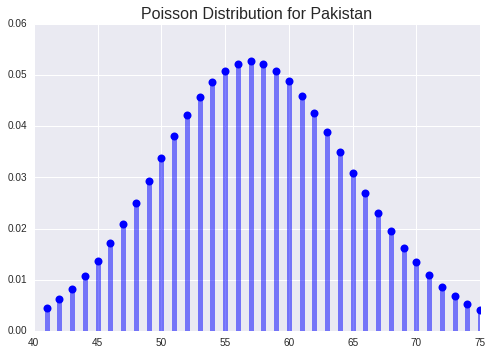

In [12]:
fig, ax = plt.subplots(1, 1)
mu = pakistanavg
mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')
x = np.arange(poisson.ppf(0.01, mu), poisson.ppf(0.99, mu))
ax.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
ax.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)
plt.title('Poisson Distribution for Pakistan', fontsize=16)

In [13]:
elsalvador = df[df['Origin']=='El Salvador']
elsalvador.head(10)

Country / territory of asylum/residence       Origin  Year     Month  \
179                                Australia  El Salvador  1999   January   
180                                Australia  El Salvador  1999  February   
181                                Australia  El Salvador  1999      June   
182                                Australia  El Salvador  1999  November   
183                                Australia  El Salvador  1999  December   
2805                                  Canada  El Salvador  1999   January   
2806                                  Canada  El Salvador  1999  February   
2807                                  Canada  El Salvador  1999     March   
2808                                  Canada  El Salvador  1999     April   
2809                                  Canada  El Salvador  1999       May   

      Value  
179     8.0  
180     3.0  
181     3.0  
182     2.0  
183     1.0  
2805   26.0  
2806   15.0  
2807   25.0  
2808   21.0  
2809   30.0

In [14]:
elsalvador.describe()

Value
count  1281.000000
mean     97.312256
std     272.620187
min       1.000000
25%       3.000000
50%      16.000000
75%      65.000000
max    2919.000000

In [15]:
elsalavg = elsalvador.mean()
elsalmed = elsalvador.median()
elsalstd = elsalvador.std()

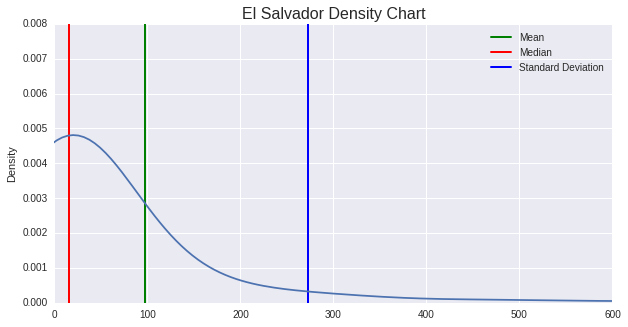

In [16]:
elsalvador.plot(kind="density",
                figsize=(10,5),
                xlim=(0, 600),
                ylim=(0.000, 0.008))


esaverage = plt.vlines(elsalavg,     # Plot black line at mean
           ymin=0, 
           ymax=0.012,
           linewidth=2.0,
           color="green",
           label='Mean')

esmedian = plt.vlines(elsalmed,   # Plot red line at median
           ymin=0, 
           ymax=0.012,
           linewidth=2.0,
           color="red",
           label='Median')

esstd = plt.vlines(elsalstd,   # Plot blue line at standard deviation 
            ymin=0, 
            ymax=0.012,
            linewidth=2.0,
            color="blue",
            label='Standard Deviation')

plt.legend(handles=[esaverage, esmedian, esstd])
plt.title('El Salvador Density Chart', fontsize=16)

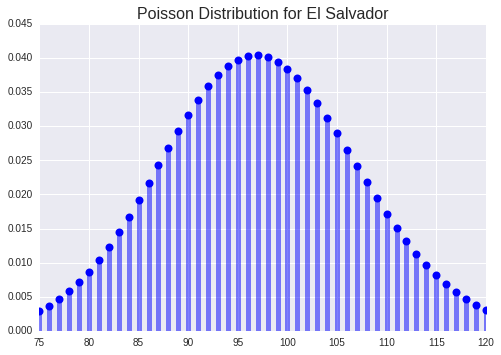

In [17]:
fig, ax = plt.subplots(1, 1)
mu = elsalavg
mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')
x = np.arange(poisson.ppf(0.01, mu), poisson.ppf(0.99, mu))
ax.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
ax.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)
plt.title('Poisson Distribution for El Salvador', fontsize=16)

In [18]:
guatemala = df[df['Origin']=='Guatemala']
guatemala.head(10)

Country / territory of asylum/residence     Origin  Year     Month  Value
229                                Australia  Guatemala  1999  December    1.0
1730                                 Belgium  Guatemala  1999   October    1.0
2915                                  Canada  Guatemala  1999   January   17.0
2916                                  Canada  Guatemala  1999  February   19.0
2917                                  Canada  Guatemala  1999     March   17.0
2918                                  Canada  Guatemala  1999     April   13.0
2919                                  Canada  Guatemala  1999       May   11.0
2920                                  Canada  Guatemala  1999      June   14.0
2921                                  Canada  Guatemala  1999      July    6.0
2922                                  Canada  Guatemala  1999    August    8.0

In [19]:
guatemala.describe()

Value
count   864.000000
mean    112.718750
std     238.141108
min       1.000000
25%       4.000000
50%      32.500000
75%      95.000000
max    1716.000000

In [20]:
guatemalaavg = guatemala.mean()
guatemalamed = guatemala.median()
guatemalastd = guatemala.std()

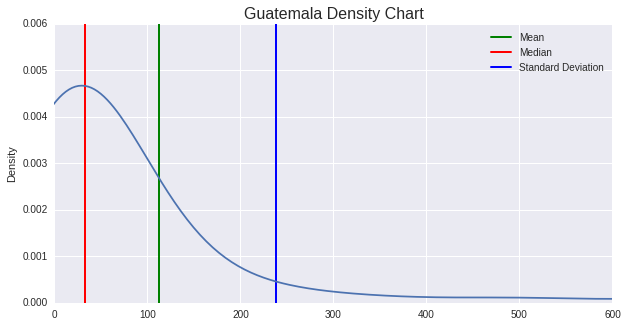

In [21]:
guatemala.plot(kind="density",
                figsize=(10,5),
                xlim=(0, 600),
                ylim=(0.000, 0.006))


gaverage = plt.vlines(guatemalaavg,     # Plot black line at mean
           ymin=0, 
           ymax=0.012,
           linewidth=2.0,
           color="green",
           label='Mean')

gmedian = plt.vlines(guatemalamed,   # Plot red line at median
           ymin=0, 
           ymax=0.012,
           linewidth=2.0,
           color="red",
           label='Median')

gstd = plt.vlines(guatemalastd,   # Plot blue line at standard deviation 
            ymin=0, 
            ymax=0.012,
            linewidth=2.0,
            color="blue",
            label='Standard Deviation')

plt.legend(handles=[gaverage, gmedian, gstd])
plt.title('Guatemala Density Chart', fontsize=16)

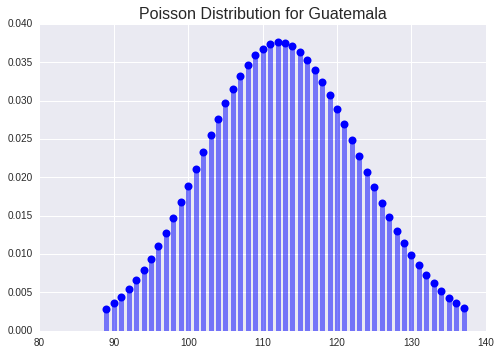

In [22]:
fig, ax = plt.subplots(1, 1)
mu = guatemalaavg
mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')
x = np.arange(poisson.ppf(0.01, mu), poisson.ppf(0.99, mu))
ax.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
ax.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)
plt.title('Poisson Distribution for Guatemala', fontsize=16)

In [23]:
egypt = df[df['Origin']=='Egypt']
egypt.head(10)

Country / territory of asylum/residence Origin  Year      Month  Value
168                               Australia  Egypt  1999   February    2.0
169                               Australia  Egypt  1999      March    3.0
170                               Australia  Egypt  1999      April    4.0
171                               Australia  Egypt  1999        May    1.0
172                               Australia  Egypt  1999       June    3.0
173                               Australia  Egypt  1999       July    3.0
174                               Australia  Egypt  1999     August    6.0
175                               Australia  Egypt  1999  September    2.0
176                               Australia  Egypt  1999    October    6.0
177                               Australia  Egypt  1999   November    8.0

In [24]:
egypt.describe()

Value
count  4056.000000
mean     13.875000
std      29.094962
min       1.000000
25%       2.000000
50%       5.000000
75%      13.000000
max     645.000000

In [25]:
egyptavg = egypt.mean()
egyptmed = egypt.median()
egyptstd = egypt.std()

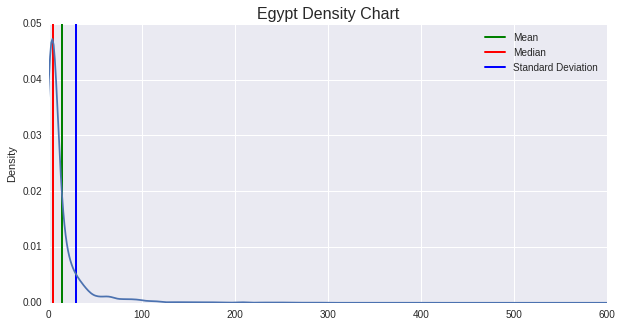

In [26]:
egypt.plot(kind="density",
                figsize=(10,5),
                xlim=(0, 600),
                ylim=(0.000, 0.050))


eaverage = plt.vlines(egyptavg,     # Plot black line at mean
           ymin=0, 
           ymax=0.050,
           linewidth=2.0,
           color="green",
           label='Mean')

emedian = plt.vlines(egyptmed,   # Plot red line at median
           ymin=0, 
           ymax=0.050,
           linewidth=2.0,
           color="red",
           label='Median')

estd = plt.vlines(egyptstd,   # Plot blue line at standard deviation 
            ymin=0, 
            ymax=0.050,
            linewidth=2.0,
            color="blue",
            label='Standard Deviation')

plt.legend(handles=[eaverage, emedian, estd])
plt.title('Egypt Density Chart', fontsize=16)

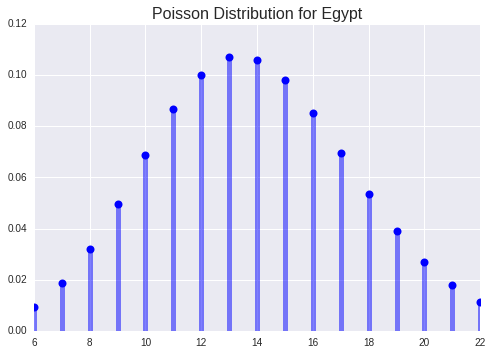

In [27]:
fig, ax = plt.subplots(1, 1)
mu = egyptavg
mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')
x = np.arange(poisson.ppf(0.01, mu), poisson.ppf(0.99, mu))
ax.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
ax.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)
plt.title('Poisson Distribution for Egypt', fontsize=16)

I then grouped these country datasets by year to calculate the maximum value from each year. I will use this maximum to compare GDP.

In [28]:
groupedhaiti = haiti.groupby('Year')['Value'].max()
groupedhaiti

Year
1999     149.0
2000     589.0
2001     556.0
2002     427.0
2003     312.0
2004     400.0
2005     665.0
2006     381.0
2007     518.0
2008     457.0
2009     223.0
2010     278.0
2011     243.0
2012     210.0
2013     160.0
2014     218.0
2015     410.0
2016    1181.0
2017     590.0
Name: Value, dtype: float64

In [29]:
groupedpakistan = pakistan.groupby('Year')['Value'].max()
groupedpakistan

Year
1999     349.0
2000     382.0
2001     366.0
2002     783.0
2003     997.0
2004     303.0
2005     383.0
2006     784.0
2007    1189.0
2008     729.0
2009     452.0
2010     508.0
2011     478.0
2012     477.0
2013     666.0
2014     882.0
2015    6100.0
2016    2227.0
2017    1087.0
Name: Value, dtype: float64

In [30]:
groupedelsalvador = elsalvador.groupby('Year')['Value'].max()
groupedelsalvador

Year
1999     117.0
2000     198.0
2001     195.0
2002     101.0
2003      92.0
2004     107.0
2005     246.0
2006     318.0
2007     290.0
2008     278.0
2009     217.0
2010     200.0
2011     356.0
2012     416.0
2013     465.0
2014     866.0
2015    1096.0
2016    2919.0
2017    2586.0
Name: Value, dtype: float64

In [31]:
groupedguatemala = guatemala.groupby('Year')['Value'].max()
groupedguatemala

Year
1999      62.0
2000     118.0
2001     198.0
2002     123.0
2003     468.0
2004     102.0
2005     214.0
2006     116.0
2007     164.0
2008     128.0
2009     121.0
2010     133.0
2011     215.0
2012     260.0
2013     278.0
2014     546.0
2015     989.0
2016    1716.0
2017    1456.0
Name: Value, dtype: float64

In [32]:
groupedegypt = egypt.groupby('Year')['Value'].max()
groupedegypt

Year
1999     27.0
2000     72.0
2001     69.0
2002     73.0
2003     70.0
2004     34.0
2005     42.0
2006    213.0
2007     35.0
2008     42.0
2009     35.0
2010     51.0
2011    135.0
2012    258.0
2013    645.0
2014    150.0
2015    210.0
2016    291.0
2017    142.0
Name: Value, dtype: float64

In [33]:
fooddeficit = pd.read_csv("../data/depth_of_the_food_deficit/food_deficit.csv", sep='\t', engine='python', encoding ='latin1', index_col=0)

del fooddeficit['Country Code']
del fooddeficit['Indicator Name']
del fooddeficit['Indicator Code']

fooddeficit.drop(['1960','1961','1962','1963','1964',
                  '1965','1966','1967','1968','1969',
                  '1970','1971','1972','1973','1974',
                  '1975','1976','1977','1978','1979',
                  '1980','1981','1982','1983','1984',
                  '1985','1986','1987','1988','1989',
                  '1990','1991','1992','1993','1994',
                  '1995','1996','1997','1998'], axis=1, inplace=True)

fooddeficit.dropna(subset=['1999','2000','2001','2002','2003','2004','2005','2006','2007','2008',
                  '2009','2010','2011','2012','2013','2014','2015','2016'], 
                  how='all', inplace=True)

fooddeficit.head()

1999        2000        2001       2002  \
Country Name                                                          
Afghanistan           312.000000  309.000000  318.000000  326.00000   
Angola                412.000000  394.000000  375.000000  354.00000   
Arab World             76.337497   75.461594   73.620802   71.74127   
United Arab Emirates    9.000000    9.000000    9.000000   10.00000   
Argentina               8.000000    7.000000    6.000000    7.00000   

                            2003        2004        2005        2006  \
Country Name                                                           
Afghanistan           321.000000  292.000000  256.000000  224.000000   
Angola                326.000000  293.000000  259.000000  232.000000   
Arab World             71.581633   72.671291   74.395876   75.825826   
United Arab Emirates   11.000000   12.000000   14.000000   18.000000   
Argentina               9.000000   12.000000   14.000000   14.000000   

                            2007       2008        2009        2010  \
Country Name                                                          
Afghanistan           201.000000  184.00000  168.000000  158.000000   
Angola                209.000000  189.00000  168.000000  149.000000   
Arab World             76.668489   76.02683   75.291664   73.402535   
United Arab Emirates   24.000000   29.00000   33.000000   35.000000   
Argentina              12.000000   11.00000   10.000000   10.000000   

                           2011        2012        2013        2014  \
Country Name                                                          
Afghanistan           151.00000  149.000000  151.000000  158.000000   
Angola                132.00000  120.000000  111.000000  104.000000   
Arab World             71.54799   55.239727   53.236849   52.198815   
United Arab Emirates   34.00000   33.000000   30.000000   26.000000   
Argentina              10.00000   10.000000    8.000000    6.000000   

                           2015        2016  
Country Name                                 
Afghanistan           166.00000  173.000000  
Angola                 96.00000   90.000000  
Arab World             51.72893   50.998723  
United Arab Emirates   22.00000   18.000000  
Argentina               3.00000    2.000000

In [49]:
afghanistanFD = fooddeficit.loc['Afghanistan']
afghanistanFD

1999    312.0
2000    309.0
2001    318.0
2002    326.0
2003    321.0
2004    292.0
2005    256.0
2006    224.0
2007    201.0
2008    184.0
2009    168.0
2010    158.0
2011    151.0
2012    149.0
2013    151.0
2014    158.0
2015    166.0
2016    173.0
Name: Afghanistan, dtype: float64

In [50]:
afghanistan = df[df['Origin']=='Afghanistan']
afghanistan.head(10)

Country / territory of asylum/residence       Origin  Year      Month  Value
0                               Australia  Afghanistan  1999    January    8.0
1                               Australia  Afghanistan  1999   February   10.0
2                               Australia  Afghanistan  1999      March   25.0
3                               Australia  Afghanistan  1999      April   25.0
4                               Australia  Afghanistan  1999        May    7.0
5                               Australia  Afghanistan  1999       June   24.0
6                               Australia  Afghanistan  1999       July   30.0
7                               Australia  Afghanistan  1999     August   15.0
8                               Australia  Afghanistan  1999  September   10.0
9                               Australia  Afghanistan  1999    October   88.0

In [51]:
afghanistan = afghanistan[afghanistan['Year'] != '2017']
afghanistan

Country / territory of asylum/residence       Origin  Year  \
0                                               Australia  Afghanistan  1999   
1                                               Australia  Afghanistan  1999   
2                                               Australia  Afghanistan  1999   
3                                               Australia  Afghanistan  1999   
4                                               Australia  Afghanistan  1999   
5                                               Australia  Afghanistan  1999   
6                                               Australia  Afghanistan  1999   
7                                               Australia  Afghanistan  1999   
8                                               Australia  Afghanistan  1999   
9                                               Australia  Afghanistan  1999   
10                                              Australia  Afghanistan  1999   
11                                              Australia  Afghanistan  1999   
709                                               Austria  Afghanistan  1999   
710                                               Austria  Afghanistan  1999   
711                                               Austria  Afghanistan  1999   
712                                               Austria  Afghanistan  1999   
713                                               Austria  Afghanistan  1999   
714                                               Austria  Afghanistan  1999   
715                                               Austria  Afghanistan  1999   
716                                               Austria  Afghanistan  1999   
717                                               Austria  Afghanistan  1999   
718                                               Austria  Afghanistan  1999   
719                                               Austria  Afghanistan  1999   
720                                               Austria  Afghanistan  1999   
1364                                              Belgium  Afghanistan  1999   
1365                                              Belgium  Afghanistan  1999   
1366                                              Belgium  Afghanistan  1999   
1367                                              Belgium  Afghanistan  1999   
1368                                              Belgium  Afghanistan  1999   
1369                                              Belgium  Afghanistan  1999   
...                                                   ...          ...   ...   
327403                                             Turkey  Afghanistan  2016   
327404                                             Turkey  Afghanistan  2016   
327900  United Kingdom of Great Britain and Northern I...  Afghanistan  2016   
327901  United Kingdom of Great Britain and Northern I...  Afghanistan  2016   
327902  United Kingdom of Great Britain and Northern I...  Afghanistan  2016   
327903  United Kingdom of Great Britain and Northern I...  Afghanistan  2016   
327904  United Kingdom of Great Britain and Northern I...  Afghanistan  2016   
327905  United Kingdom of Great Britain and Northern I...  Afghanistan  2016   
327906  United Kingdom of Great Britain and Northern I...  Afghanistan  2016   
327907  United Kingdom of Great Britain and Northern I...  Afghanistan  2016   
327908  United Kingdom of Great Britain and Northern I...  Afghanistan  2016   
327909  United Kingdom of Great Britain and Northern I...  Afghanistan  2016   
327910  United Kingdom of Great Britain and Northern I...  Afghanistan  2016   
327911  United Kingdom of Great Britain and Northern I...  Afghanistan  2016   
329287                                         USA (EOIR)  Afghanistan  2016   
329288                                         USA (EOIR)  Afghanistan  2016   
329289                                         USA (EOIR)  Afghanistan  2016   
329290                                         USA (EOIR)  Afghanistan  2016   
329944            

In [52]:
afghanYearly=afghanistan.groupby(['Year'], as_index=True, sort=True)['Value'].sum()
afghanYearly

Year
1999     25053.0
2000     31609.0
2001     53203.0
2002     26498.0
2003     14308.0
2004      9199.0
2005      8106.0
2006      8653.0
2007      9293.0
2008     18436.0
2009     27102.0
2010     26570.0
2011     36356.0
2012     47520.0
2013     36115.0
2014     59271.0
2015    258518.0
2016    220820.0
Name: Value, dtype: float64

In [53]:
afghanFood=pd.DataFrame({'Year':afghanYearly.index, 'Food_Deficit':afghanistanFD.values})
afghanFood

Food_Deficit  Year
0          312.0  1999
1          309.0  2000
2          318.0  2001
3          326.0  2002
4          321.0  2003
5          292.0  2004
6          256.0  2005
7          224.0  2006
8          201.0  2007
9          184.0  2008
10         168.0  2009
11         158.0  2010
12         151.0  2011
13         149.0  2012
14         151.0  2013
15         158.0  2014
16         166.0  2015
17         173.0  2016

In [54]:
afghanRefugees=pd.DataFrame({'Year':afghanYearly.index, 'Refugees':afghanYearly.values})
afghanRefugees

Refugees  Year
0    25053.0  1999
1    31609.0  2000
2    53203.0  2001
3    26498.0  2002
4    14308.0  2003
5     9199.0  2004
6     8106.0  2005
7     8653.0  2006
8     9293.0  2007
9    18436.0  2008
10   27102.0  2009
11   26570.0  2010
12   36356.0  2011
13   47520.0  2012
14   36115.0  2013
15   59271.0  2014
16  258518.0  2015
17  220820.0  2016

In [55]:
afghan=afghanRefugees.merge(afghanFood,how='inner', left_index=True, right_index=True)
afghan.set_index('Year_x', inplace=True, drop=True)
afghan.index.name='Year'
afghan=afghan.drop('Year_y', axis=1)
afghan

Refugees  Food_Deficit
Year                        
1999   25053.0         312.0
2000   31609.0         309.0
2001   53203.0         318.0
2002   26498.0         326.0
2003   14308.0         321.0
2004    9199.0         292.0
2005    8106.0         256.0
2006    8653.0         224.0
2007    9293.0         201.0
2008   18436.0         184.0
2009   27102.0         168.0
2010   26570.0         158.0
2011   36356.0         151.0
2012   47520.0         149.0
2013   36115.0         151.0
2014   59271.0         158.0
2015  258518.0         166.0
2016  220820.0         173.0

In [56]:
iraqFD = fooddeficit.loc['Iraq']
iraqFD

1999    167.0
2000    168.0
2001    160.0
2002    155.0
2003    157.0
2004    167.0
2005    179.0
2006    189.0
2007    203.0
2008    211.0
2009    215.0
2010    209.0
2011    203.0
2012    197.0
2013    193.0
2014    190.0
2015    188.0
2016    185.0
Name: Iraq, dtype: float64

In [57]:
iraq = df[df['Origin']=='Iraq']
iraq.head(10)

Country / territory of asylum/residence Origin  Year      Month  Value
272                               Australia   Iraq  1999    January   33.0
273                               Australia   Iraq  1999   February   48.0
274                               Australia   Iraq  1999      March   42.0
275                               Australia   Iraq  1999      April   55.0
276                               Australia   Iraq  1999        May   42.0
277                               Australia   Iraq  1999       June   60.0
278                               Australia   Iraq  1999       July   36.0
279                               Australia   Iraq  1999     August   53.0
280                               Australia   Iraq  1999  September  153.0
281                               Australia   Iraq  1999    October   74.0

In [58]:
iraq = iraq[iraq['Year'] != '2017']
iraq

Country / territory of asylum/residence Origin  Year  \
272                                             Australia   Iraq  1999   
273                                             Australia   Iraq  1999   
274                                             Australia   Iraq  1999   
275                                             Australia   Iraq  1999   
276                                             Australia   Iraq  1999   
277                                             Australia   Iraq  1999   
278                                             Australia   Iraq  1999   
279                                             Australia   Iraq  1999   
280                                             Australia   Iraq  1999   
281                                             Australia   Iraq  1999   
282                                             Australia   Iraq  1999   
283                                             Australia   Iraq  1999   
1021                                              Austria   Iraq  1999   
1022                                              Austria   Iraq  1999   
1023                                              Austria   Iraq  1999   
1024                                              Austria   Iraq  1999   
1025                                              Austria   Iraq  1999   
1026                                              Austria   Iraq  1999   
1027                                              Austria   Iraq  1999   
1028                                              Austria   Iraq  1999   
1029                                              Austria   Iraq  1999   
1030                                              Austria   Iraq  1999   
1031                                              Austria   Iraq  1999   
1032                                              Austria   Iraq  1999   
1783                                              Belgium   Iraq  1999   
1784                                              Belgium   Iraq  1999   
1785                                              Belgium   Iraq  1999   
1786                                              Belgium   Iraq  1999   
1787                                              Belgium   Iraq  1999   
1788                                              Belgium   Iraq  1999   
...                                                   ...    ...   ...   
328435  United Kingdom of Great Britain and Northern I...   Iraq  2016   
328436  United Kingdom of Great Britain and Northern I...   Iraq  2016   
328437  United Kingdom of Great Britain and Northern I...   Iraq  2016   
328438  United Kingdom of Great Britain and Northern I...   Iraq  2016   
328439  United Kingdom of Great Britain and Northern I...   Iraq  2016   
328440  United Kingdom of Great Britain and Northern I...   Iraq  2016   
328441  United Kingdom of Great Britain and Northern I...   Iraq  2016   
328442  United Kingdom of Great Britain and Northern I...   Iraq  2016   
328443  United Kingdom of Great Britain and Northern I...   Iraq  2016   
329643                                         USA (EOIR)   Iraq  2016   
329644                                         USA (EOIR)   Iraq  2016   
329645                                         USA (EOIR)   Iraq  2016   
329647                                         USA (EOIR)   Iraq  2016   
329649                                         USA (EOIR)   Iraq  2016   
329650                                         USA (EOIR)   Iraq  2016   
329651                                         USA (EOIR)   Iraq  2016   
329652                                         USA (EOIR)   Iraq  2016   
329653                                         USA (EOIR)   Iraq  2016   
330930                                      USA (INS/DHS)   Iraq  2016   
330931                                      USA (INS/DHS)   Iraq  2016   
330932                                      USA (INS/DHS)   Iraq  2016   
330933                                      USA (INS/DHS)   Iraq  2016   
330934                

In [59]:
iraqYearly=iraq.groupby(['Year'], as_index=True, sort=True)['Value'].sum()
iraqYearly

Year
1999     34746.0
2000     39965.0
2001     50123.0
2002     51950.0
2003     25751.0
2004     10780.0
2005     13522.0
2006     22859.0
2007     44791.0
2008     40299.0
2009     24316.0
2010     20531.0
2011     23748.0
2012     21018.0
2013     37333.0
2014     68591.0
2015    186617.0
2016    157177.0
Name: Value, dtype: float64

In [60]:
iraqFood=pd.DataFrame({'Year':iraqYearly.index, 'Food_Deficit':iraqFD.values})
iraqFood

Food_Deficit  Year
0          167.0  1999
1          168.0  2000
2          160.0  2001
3          155.0  2002
4          157.0  2003
5          167.0  2004
6          179.0  2005
7          189.0  2006
8          203.0  2007
9          211.0  2008
10         215.0  2009
11         209.0  2010
12         203.0  2011
13         197.0  2012
14         193.0  2013
15         190.0  2014
16         188.0  2015
17         185.0  2016

In [61]:
iraqRefugees=pd.DataFrame({'Year':iraqYearly.index, 'Refugees':iraqYearly.values})
iraqRefugees

Refugees  Year
0    34746.0  1999
1    39965.0  2000
2    50123.0  2001
3    51950.0  2002
4    25751.0  2003
5    10780.0  2004
6    13522.0  2005
7    22859.0  2006
8    44791.0  2007
9    40299.0  2008
10   24316.0  2009
11   20531.0  2010
12   23748.0  2011
13   21018.0  2012
14   37333.0  2013
15   68591.0  2014
16  186617.0  2015
17  157177.0  2016

In [62]:
iraq=iraqRefugees.merge(iraqFood,how='inner', left_index=True, right_index=True)
iraq.set_index('Year_x', inplace=True, drop=True)
iraq.index.name='Year'
iraq=iraq.drop('Year_y', axis=1)
iraq

Refugees  Food_Deficit
Year                        
1999   34746.0         167.0
2000   39965.0         168.0
2001   50123.0         160.0
2002   51950.0         155.0
2003   25751.0         157.0
2004   10780.0         167.0
2005   13522.0         179.0
2006   22859.0         189.0
2007   44791.0         203.0
2008   40299.0         211.0
2009   24316.0         215.0
2010   20531.0         209.0
2011   23748.0         203.0
2012   21018.0         197.0
2013   37333.0         193.0
2014   68591.0         190.0
2015  186617.0         188.0
2016  157177.0         185.0

In [65]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model for the countries
lmAfghan = smf.ols(formula='Refugees ~ Food_Deficit', data=afghan).fit()
lmIraq = smf.ols(formula='Refugees ~ Food_Deficit', data=iraq).fit()

print "Afghanistan Params"
print lmAfghan.params
print " "
print "Iraq Params"
print lmIraq.params

Afghanistan Params
Intercept       123014.876164
Food_Deficit      -323.036537
dtype: float64
 
Iraq Params
Intercept       58947.457540
Food_Deficit      -56.036342
dtype: float64


In [66]:
afghanUpdate=pd.DataFrame({'Food_Deficit':[afghan['Food_Deficit'].min(),afghan['Food_Deficit'].max()]})
afghanUpdate

Food_Deficit
0         149.0
1         326.0

In [67]:
iraqUpdate=pd.DataFrame({'Food_Deficit':[iraq['Food_Deficit'].min(),iraq['Food_Deficit'].max()]})
iraqUpdate

Food_Deficit
0         155.0
1         215.0

In [68]:
afghanpred = lmAfghan.predict(afghanUpdate)
print "Afghanistan"
print afghanpred
print " "
iraqpred = lmIraq.predict(iraqUpdate)
print "Iraq"
print iraqpred

Afghanistan
0    74882.432083
1    17704.964954
dtype: float64
 
Iraq
0    50261.824585
1    46899.644087
dtype: float64


/usr/local/lib/python2.7/dist-packages/pandas/core/computation/check.py:17: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


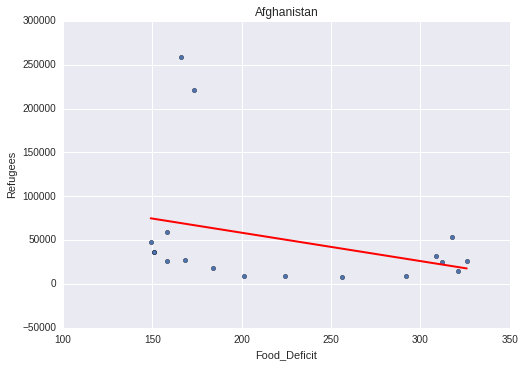

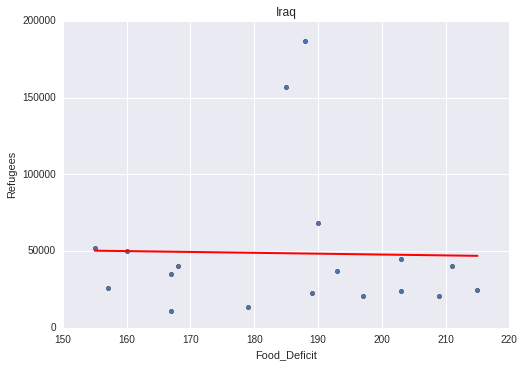

In [69]:
plt.figure(1)
# first, plot the observed data
afghan.plot(kind='scatter', x='Food_Deficit', y='Refugees')

# then, plot the least squares line
plt.plot(afghanUpdate, afghanpred, c='red', linewidth=2)
plt.title("Afghanistan")
plt.figure(2)
iraq.plot(kind='scatter', x='Food_Deficit', y='Refugees')

plt.plot(iraqUpdate, iraqpred, c='red', linewidth=2)
plt.title("Iraq")

In [72]:
gdp = pd.read_csv("../data/GDP_per_capita(US$)/GDP_per_capita.csv", sep="\t", engine='python', encoding ='latin1',index_col=0) 

del gdp['Country Code']
del gdp['Indicator Name']
del gdp['Indicator Code']

gdp.drop(['1960','1961','1962','1963','1964',
                  '1965','1966','1967','1968','1969',
                  '1970','1971','1972','1973','1974',
                  '1975','1976','1977','1978','1979',
                  '1980','1981','1982','1983','1984',
                  '1985','1986','1987','1988','1989',
                  '1990','1991','1992','1993','1994',
                  '1995','1996','1997','1998'], axis=1, inplace=True)

gdp.dropna(subset=['1999','2000','2001','2002','2003','2004','2005','2006','2007','2008',
                  '2009','2010','2011','2012','2013','2014','2015','2016'], 
                  how='all', inplace=True)

gdp.head()

1999          2000          2001          2002  \
Country Name                                                           
Aruba         19356.203390  20620.700630  20670.655660  20434.299440   
Afghanistan            NaN           NaN    117.409691    187.845095   
Angola          385.768854    555.296942    526.168743    711.181716   
Albania        1098.425463   1175.788981   1326.970339   1453.642777   
Andorra       19261.710500  21435.926400  22037.360550  24518.343060   

                      2003          2004          2005          2006  \
Country Name                                                           
Aruba         20834.510200  22567.824920  23302.831990  24014.944270   
Afghanistan     198.728544    219.141353    250.294130    272.563077   
Angola          779.468306   1041.086844   1443.991929   2062.415149   
Albania        1890.681557   2416.588235   2709.142931   3005.012903   
Andorra       32438.683900  38255.950500  41185.989020  43666.985140   

                      2007          2008          2009          2010  \
Country Name                                                           
Aruba         25921.026050  27546.899390  24631.434860  24271.940420   
Afghanistan     369.835796    373.361116    445.893298    553.300289   
Angola         2878.837144   3868.578883   3347.844850   3529.053482   
Albania        3603.013685   4370.539647   4114.136545   4094.358832   
Andorra       48510.467280  47712.299080  43215.687010  39627.663520   

                      2011          2012          2013         2014  \
Country Name                                                          
Aruba         25324.720360           NaN           NaN          NaN   
Afghanistan     603.537023    669.009051    631.744971   612.069651   
Angola         4299.012889   4598.249988   4804.616884  4709.312024   
Albania        4437.178068   4247.614308   4414.723140  4575.763787   
Andorra       40919.183280  38167.095750  40215.435320          NaN   

                     2015         2016  
Country Name                            
Aruba                 NaN          NaN  
Afghanistan    584.025902   561.778746  
Angola        3695.793748  3110.808183  
Albania       3954.022783  4146.896250  
Andorra               NaN          NaN

In [73]:
afghanistanGDP = gdp.loc['Afghanistan']
afghanistanGDP

1999           NaN
2000           NaN
2001    117.409691
2002    187.845095
2003    198.728544
2004    219.141353
2005    250.294130
2006    272.563077
2007    369.835796
2008    373.361116
2009    445.893298
2010    553.300289
2011    603.537023
2012    669.009051
2013    631.744971
2014    612.069651
2015    584.025902
2016    561.778746
Name: Afghanistan, dtype: float64

In [76]:
afghanGDP=pd.DataFrame({'Year':afghanYearly.index, 'GDP':afghanistanGDP.values})
afghanGDP

GDP  Year
0          NaN  1999
1          NaN  2000
2   117.409691  2001
3   187.845095  2002
4   198.728544  2003
5   219.141353  2004
6   250.294130  2005
7   272.563077  2006
8   369.835796  2007
9   373.361116  2008
10  445.893298  2009
11  553.300289  2010
12  603.537023  2011
13  669.009051  2012
14  631.744971  2013
15  612.069651  2014
16  584.025902  2015
17  561.778746  2016

In [77]:
afg=afghanRefugees.merge(afghanGDP,how='inner', left_index=True, right_index=True)
afg.set_index('Year_x', inplace=True, drop=True)
afg.index.name='Year'
afg=afg.drop('Year_y', axis=1)
afg

Refugees         GDP
Year                      
1999   25053.0         NaN
2000   31609.0         NaN
2001   53203.0  117.409691
2002   26498.0  187.845095
2003   14308.0  198.728544
2004    9199.0  219.141353
2005    8106.0  250.294130
2006    8653.0  272.563077
2007    9293.0  369.835796
2008   18436.0  373.361116
2009   27102.0  445.893298
2010   26570.0  553.300289
2011   36356.0  603.537023
2012   47520.0  669.009051
2013   36115.0  631.744971
2014   59271.0  612.069651
2015  258518.0  584.025902
2016  220820.0  561.778746

In [78]:
iraqGDP = gdp.loc['Iraq']
iraqGDP

1999            NaN
2000            NaN
2001            NaN
2002            NaN
2003            NaN
2004    1391.816923
2005    1849.603911
2006    2351.812429
2007    3129.224922
2008    4521.032470
2009    3735.144836
2010    4502.749048
2011    5854.614497
2012    6651.122420
2013    6925.224046
2014    6703.074737
2015    4974.026930
2016    4609.600694
Name: Iraq, dtype: float64

In [79]:
irqGDP=pd.DataFrame({'Year':iraqYearly.index, 'GDP':iraqGDP.values})
irqGDP

GDP  Year
0           NaN  1999
1           NaN  2000
2           NaN  2001
3           NaN  2002
4           NaN  2003
5   1391.816923  2004
6   1849.603911  2005
7   2351.812429  2006
8   3129.224922  2007
9   4521.032470  2008
10  3735.144836  2009
11  4502.749048  2010
12  5854.614497  2011
13  6651.122420  2012
14  6925.224046  2013
15  6703.074737  2014
16  4974.026930  2015
17  4609.600694  2016

In [81]:
Iraq=iraqRefugees.merge(irqGDP,how='inner', left_index=True, right_index=True)
Iraq.set_index('Year_x', inplace=True, drop=True)
Iraq.index.name='Year'
Iraq=Iraq.drop('Year_y', axis=1)
Iraq

Refugees          GDP
Year                       
1999   34746.0          NaN
2000   39965.0          NaN
2001   50123.0          NaN
2002   51950.0          NaN
2003   25751.0          NaN
2004   10780.0  1391.816923
2005   13522.0  1849.603911
2006   22859.0  2351.812429
2007   44791.0  3129.224922
2008   40299.0  4521.032470
2009   24316.0  3735.144836
2010   20531.0  4502.749048
2011   23748.0  5854.614497
2012   21018.0  6651.122420
2013   37333.0  6925.224046
2014   68591.0  6703.074737
2015  186617.0  4974.026930
2016  157177.0  4609.600694

In [82]:
# create a fitted model for the countries
lmAfghan2 = smf.ols(formula='Refugees ~ GDP', data=afg).fit()
lmIraq2 = smf.ols(formula='Refugees ~ GDP', data=Iraq).fit()

print "Afghanistan Params"
print lmAfghan2.params
print " "
print "Iraq Params"
print lmIraq2.params

Afghanistan Params
Intercept   -14923.461618
GDP            165.211210
dtype: float64
 
Iraq Params
Intercept    20120.820045
GDP              7.168150
dtype: float64


In [83]:
afghanUpdate2=pd.DataFrame({'GDP':[afg['GDP'].min(),afg['GDP'].max()]})
afghanUpdate2

GDP
0  117.409691
1  669.009051

In [84]:
iraqUpdate2=pd.DataFrame({'GDP':[Iraq['GDP'].min(),Iraq['GDP'].max()]})
iraqUpdate2

GDP
0  1391.816923
1  6925.224046

In [85]:
afghanpred2 = lmAfghan2.predict(afghanUpdate2)
print "Afghanistan"
print afghanpred2
print " "
iraqpred2 = lmIraq2.predict(iraqUpdate2)
print "Iraq"
print iraqpred2

Afghanistan
0     4473.935462
1    95604.333167
dtype: float64
 
Iraq
0    30097.572144
1    69761.862911
dtype: float64


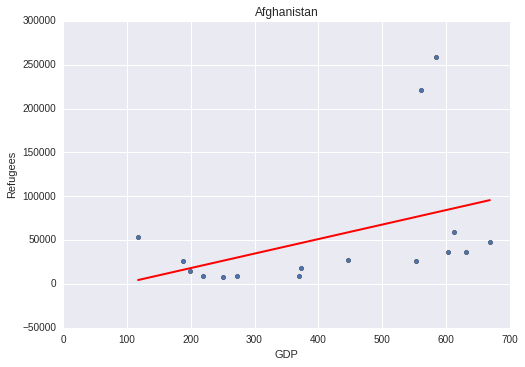

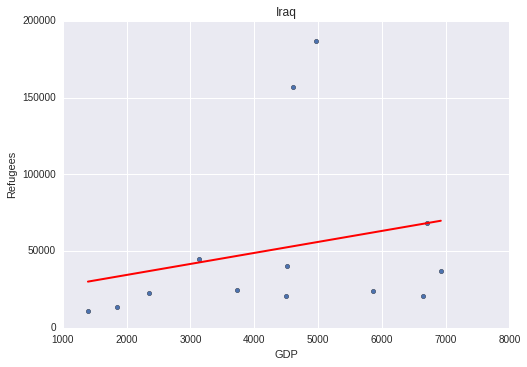

In [87]:
plt.figure(1)
# first, plot the observed data
afg.plot(kind='scatter', x='GDP', y='Refugees')

# then, plot the least squares line
plt.plot(afghanUpdate2, afghanpred2, c='red', linewidth=2)
plt.title("Afghanistan")
plt.figure(2)
Iraq.plot(kind='scatter', x='GDP', y='Refugees')

plt.plot(iraqUpdate2, iraqpred2, c='red', linewidth=2)
plt.title("Iraq")